## First Step

### Imports and Linking Drive

In [152]:
import sys as sys
import pandas as pd
import matplotlib.pyplot as plt
import os, glob
import shutil
import pathlib

In [153]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [154]:
my_local_drive='/content/gdrive/My Drive/Colab Notebooks/TER/'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive
%pwd

/content/gdrive/My Drive/Colab Notebooks/TER


'/content/gdrive/My Drive/Colab Notebooks/TER'

### Data visualization and first preprocessing




In [155]:
fileName = "train.csv"
data = pd.read_csv(fileName, delimiter=',')

In [156]:
data.head(2)

,Image,whaleID
0,w_7812.jpg,whale_48813
1,w_4598.jpg,whale_09913


In [157]:
whaleIDs = data["whaleID"].unique()
whaleImages = data["Image"].unique()
print(len(whaleIDs))

447


In [158]:
nbOccurences = data["whaleID"].value_counts()
print(nbOccurences)

whale_95370    47
whale_38681    43
whale_28892    33
whale_90957    30
whale_36851    30
               ..
whale_21655     1
whale_88432     1
whale_66539     1
whale_22212     1
whale_51114     1
Name: whaleID, Length: 447, dtype: int64


Nombre d'apparitions maximale d'une baleine :  47
Nombre d'apparitions minimale d'une baleine :  1



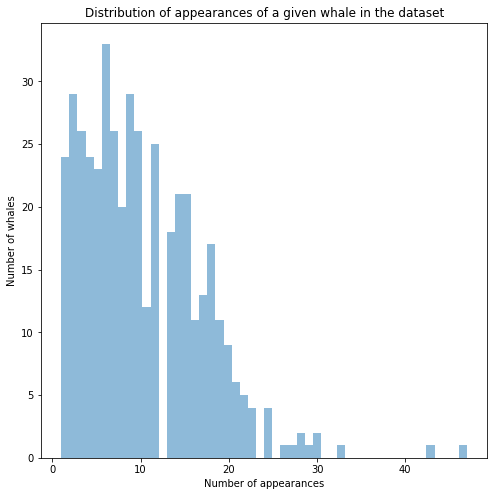

In [159]:
print("Nombre d'apparitions maximale d'une baleine : ", max(nbOccurences))
print("Nombre d'apparitions minimale d'une baleine : ", min(nbOccurences))
print()

plt.figure(figsize=(8,8))
ax = nbOccurences.plot.hist(bins=50, alpha=0.5)
ax.set_title("Distribution of appearances of a given whale in the dataset")
plt.xlabel("Number of appearances")
plt.ylabel("Number of whales")
plt.show()

**firstGroup** := whales appearing between 1 to 5 times <br>
**secondGroup** := whales appearing between 5 to 10 times

In [160]:
preProFg = nbOccurences.where(nbOccurences <= 5)
preProFg = preProFg.dropna()

preProSg = nbOccurences.where(nbOccurences.between(5, 10))
preProSg = preProSg.dropna()

preProNewGroup = nbOccurences.where(nbOccurences <= 2)
preProNewGroup = preProNewGroup.dropna()

Make them as arrays

In [161]:
firstGroup = preProFg.index.array
secondGroup = preProSg.index.array
newGroup = preProNewGroup.index.array
print(len(newGroup), "whales appear between 1 and 2 times in the dataset")

53 whales appear between 1 and 2 times in the dataset


In [162]:
# toutes les images de la baleine qui apparaît le plus
#print(data["Image"].where(data["whaleID"] == "whale_95370" ).dropna())

on prend les images ou apparaissent les baleines du group1 et celles ou apparaissent les images du groupe2 cad celles où les baleines apparaissent dans respectivement 1 à 5 images et 6 à 10 images

In [163]:
def getImages(first_g, sec_g, new_g):
  contentFirstGroup = []
  contentSecondGroup = []
  contentNewGroup = []
  for img1 in range(0, len(first_g)):
    serie = data["Image"].where(data["whaleID"] == first_g[img1] ).dropna().values
    contentFirstGroup.append(serie)
  for img2 in range(0, len(sec_g)):
    serie = data["Image"].where(data["whaleID"] == sec_g[img2] ).dropna().values
    contentSecondGroup.append(serie)
  for img3 in range(0, len(new_g)):
    serie = data["Image"].where(data["whaleID"] == new_g[img3] ).dropna().values
    contentNewGroup.append(serie)
  return contentFirstGroup, contentSecondGroup, contentNewGroup

In [164]:
imagesFirstGroup, imagesSecondGroup, imagesNewGroup = getImages(firstGroup, secondGroup, newGroup)

In [165]:
print("new group : ", newGroup)
print()
print("Images where appear whale of id ... ", data["Image"].where(data["whaleID"] == "whale_13701" ).dropna().values)

new group :  <PandasArray>
['whale_73167', 'whale_44699', 'whale_90929', 'whale_45367', 'whale_45728',
 'whale_17327', 'whale_80124', 'whale_69943', 'whale_47768', 'whale_09422',
 'whale_48024', 'whale_07331', 'whale_07483', 'whale_16762', 'whale_13701',
 'whale_03103', 'whale_26212', 'whale_34813', 'whale_02839', 'whale_87420',
 'whale_83157', 'whale_16576', 'whale_90141', 'whale_14626', 'whale_97440',
 'whale_27860', 'whale_38437', 'whale_65263', 'whale_67801', 'whale_56281',
 'whale_54796', 'whale_34513', 'whale_81915', 'whale_88226', 'whale_90966',
 'whale_22848', 'whale_86081', 'whale_08729', 'whale_05140', 'whale_89271',
 'whale_88085', 'whale_40483', 'whale_04480', 'whale_64299', 'whale_77984',
 'whale_54497', 'whale_51332', 'whale_45294', 'whale_21655', 'whale_88432',
 'whale_66539', 'whale_22212', 'whale_51114']
Length: 53, dtype: object

Images where appear whale of id ...  ['w_830.jpg' 'w_7912.jpg']


In [166]:
contentFirstGroup = []
contentSecondGroup = []
contentNewGroup = []

for i in imagesFirstGroup:
  for y in i:
    contentFirstGroup.append(y)

for i in imagesSecondGroup:
  for y in i:
    contentSecondGroup.append(y)

for i in imagesNewGroup:
  for y in i:
    contentNewGroup.append(y)

print("nb d'images premier groupe: " ,len(contentFirstGroup))
print("nb d'images second groupe: ", len(contentSecondGroup))
print("nb d'images new groupe: ", len(contentNewGroup))
print(contentNewGroup)

nb d'images premier groupe:  371
nb d'images second groupe:  1176
nb d'images new groupe:  82
['w_5625.jpg', 'w_2374.jpg', 'w_3313.jpg', 'w_7863.jpg', 'w_3239.jpg', 'w_8953.jpg', 'w_6556.jpg', 'w_8013.jpg', 'w_5138.jpg', 'w_1467.jpg', 'w_3348.jpg', 'w_5404.jpg', 'w_9298.jpg', 'w_3382.jpg', 'w_9470.jpg', 'w_5834.jpg', 'w_8079.jpg', 'w_151.jpg', 'w_3227.jpg', 'w_2534.jpg', 'w_2825.jpg', 'w_6719.jpg', 'w_998.jpg', 'w_5454.jpg', 'w_3508.jpg', 'w_669.jpg', 'w_2229.jpg', 'w_1240.jpg', 'w_830.jpg', 'w_7912.jpg', 'w_8706.jpg', 'w_6516.jpg', 'w_1080.jpg', 'w_8235.jpg', 'w_1304.jpg', 'w_3749.jpg', 'w_4678.jpg', 'w_8069.jpg', 'w_762.jpg', 'w_3112.jpg', 'w_6131.jpg', 'w_7804.jpg', 'w_6281.jpg', 'w_8961.jpg', 'w_4458.jpg', 'w_617.jpg', 'w_8915.jpg', 'w_7970.jpg', 'w_8600.jpg', 'w_5882.jpg', 'w_9308.jpg', 'w_610.jpg', 'w_6700.jpg', 'w_340.jpg', 'w_7470.jpg', 'w_4426.jpg', 'w_746.jpg', 'w_4958.jpg', 'w_1881.jpg', 'w_3003.jpg', 'w_4269.jpg', 'w_5471.jpg', 'w_7758.jpg', 'w_5493.jpg', 'w_5640.jpg', 'w_7

In [167]:
# Replace each item of the list by wC to compare on the cropped whales folder and keep the images we want
contentFirstGroup = [content.replace("w", "wCR")  for content in contentFirstGroup]
contentSecondGroup = [content.replace("w", "wCR")  for content in contentSecondGroup]
contentNewGroup = [content.replace("w", "wCR")  for content in contentNewGroup]

In [168]:
print(contentFirstGroup)
print(contentSecondGroup)
print(len(contentNewGroup))

['wCR_4844.jpg', 'wCR_8578.jpg', 'wCR_896.jpg', 'wCR_2472.jpg', 'wCR_1278.jpg', 'wCR_6797.jpg', 'wCR_4525.jpg', 'wCR_1876.jpg', 'wCR_7808.jpg', 'wCR_8099.jpg', 'wCR_799.jpg', 'wCR_8111.jpg', 'wCR_3488.jpg', 'wCR_9006.jpg', 'wCR_3687.jpg', 'wCR_9406.jpg', 'wCR_6763.jpg', 'wCR_1774.jpg', 'wCR_3039.jpg', 'wCR_4508.jpg', 'wCR_3484.jpg', 'wCR_6429.jpg', 'wCR_8542.jpg', 'wCR_754.jpg', 'wCR_458.jpg', 'wCR_7820.jpg', 'wCR_9349.jpg', 'wCR_6647.jpg', 'wCR_2439.jpg', 'wCR_476.jpg', 'wCR_8720.jpg', 'wCR_6761.jpg', 'wCR_3431.jpg', 'wCR_5059.jpg', 'wCR_8929.jpg', 'wCR_133.jpg', 'wCR_3527.jpg', 'wCR_8271.jpg', 'wCR_1231.jpg', 'wCR_1668.jpg', 'wCR_7437.jpg', 'wCR_1793.jpg', 'wCR_4246.jpg', 'wCR_6212.jpg', 'wCR_212.jpg', 'wCR_9088.jpg', 'wCR_3745.jpg', 'wCR_9417.jpg', 'wCR_8982.jpg', 'wCR_3741.jpg', 'wCR_1218.jpg', 'wCR_8966.jpg', 'wCR_2188.jpg', 'wCR_2587.jpg', 'wCR_88.jpg', 'wCR_181.jpg', 'wCR_7039.jpg', 'wCR_3135.jpg', 'wCR_9462.jpg', 'wCR_15.jpg', 'wCR_2113.jpg', 'wCR_1861.jpg', 'wCR_368.jpg', 'wCR

### Take the images of first and second group from FaceNetTraining folder and put them in a specific folder in Drive

In [169]:
# New Group
for i in range(0, len(contentNewGroup)):
    src_path = r"./FaceNetTraining/"+contentNewGroup[i]
    dst_path = r"./NewGroupWhales/"+contentNewGroup[i]
    shutil.copy(src_path, dst_path)

In [ ]:
# Second group
for i in range(0, len(contentSecondGroup)):
    src_path = r"./FaceNetTraining/"+contentSecondGroup[i]
    dst_path = r"./SecondGroupWhales/"+contentSecondGroup[i]
    shutil.copy(src_path, dst_path)

## Second Step

### Some other prepro

Change our according to the previous processing 

In [176]:
data["Image"] = data["Image"].replace("w_", "wCR_", regex=True)
data.head(2)

,Image,whaleID
0,wCR_7812.jpg,whale_48813
1,wCR_4598.jpg,whale_09913


In [177]:
print(data["whaleID"].where(data["Image"] == "wCR_3964.jpg" ).dropna().values[0])

whale_95370


Regex to have to file name in the form "wC_i.jpg"

In [178]:
import re 
def keepOriginalFileName(fn):
  pattern = "(?s)^.*?(?=wC)"
  fn = re.sub(pattern, "", fn)
  return fn

## Data Augmentation

### Initial

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import random

Initial image

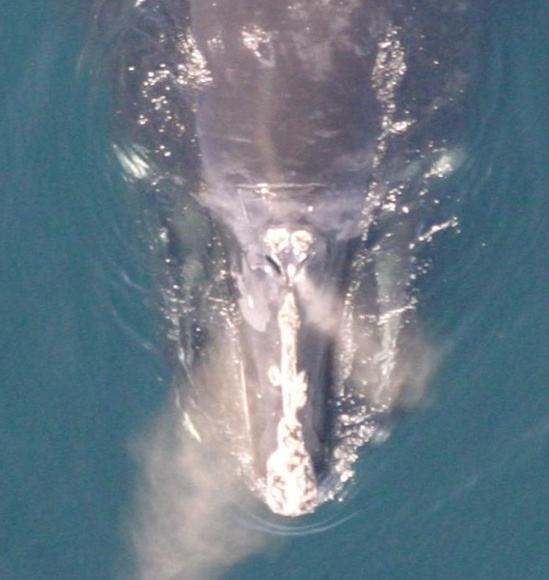

(580, 549, 3)


In [ ]:
img = cv2.imread(cv2.samples.findFile("./FaceNetTraining/wCR_5553.jpg"))
if img is None:
    sys.exit("Could not read the image.")
cv2_imshow(img)
print(img.shape)

### Scaling

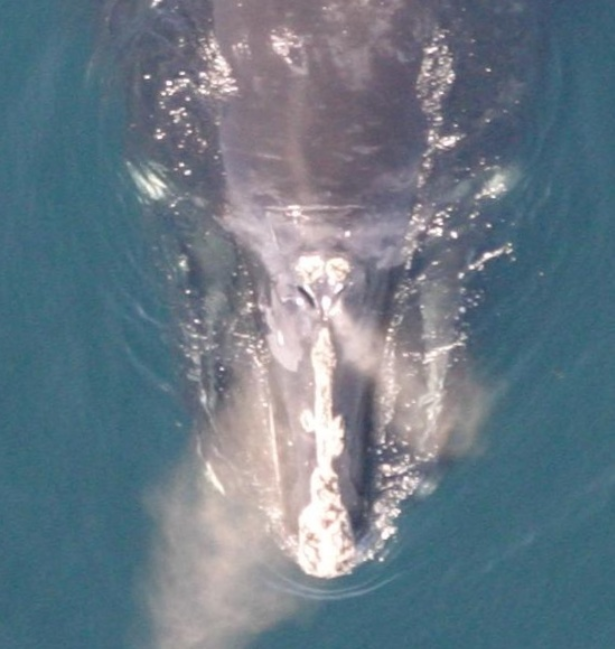

(649, 615, 3)


In [179]:
scale_down = random.uniform(1, 1.2)
imgScaled = cv2.resize(img, None, fx= scale_down, fy= scale_down, interpolation= cv2.INTER_LINEAR)
cv2_imshow(imgScaled) 
print(imgScaled.shape)

### Random flip

(649, 615, 3)


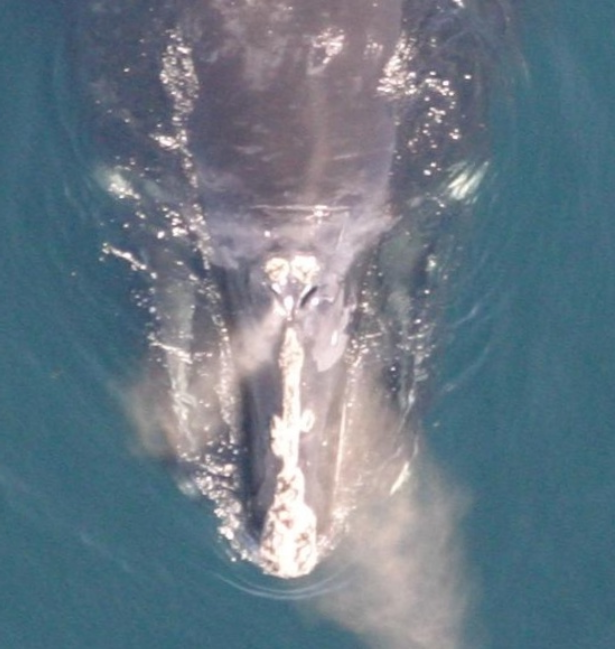

In [180]:
# flipcode = 0 : flip vertically.
# flipcode > 0 : flip horizontally.
# flipcode < 0 : flip vertically and horizontally.

imgFlipped = cv2.flip(imgScaled, 4)
print(imgFlipped.shape)
cv2_imshow(imgFlipped)

### Translation (up to 4 pixels)

In [181]:
from pandas._libs.internals import NumpyBlock
def translationImg(img, n):

  getAvg = 0
  if (n > 4):
    raise ValueError("the argument n must be under 4")
  elif (n < 4):
        raise ValueError("the argument n must be above -4")

  # [-4,4] excluding 0      
  nb = random.choice([i for i in range(-n,n) if i not in [0]])

  # random choice for translation tx or ty with equiprobability (not both at the same time)
  tx, ty = 0, 0
  sampleList = ["tx", "ty"]
  x = random.choice(sampleList)
  if x == "tx":
    tx = nb
  elif x == "ty":
    ty = nb

  print(x)
  M = np.float32([
    [1, 0, tx], # from right(negative), from left(positive)
    [0, 1, ty] # from bottom(negative), à partir du top(positive) 
  ])
  print("nb:",nb)
  if (nb < 0):
    nb = abs(nb)
    if ty:
      crop_img = img[int(img.shape[0]-nb):img.shape[0], :] # axe y (lines) [lines, columns] # bottom
    elif tx:
      crop_img= img[:, int(img.shape[1]-nb):img.shape[1]]
    # average over 3 channels
    getAvg = np.average(crop_img, axis = (0,1))
  if (nb > 0):
    nb = abs(nb)
    if ty:
      crop_img = img[:nb, :img.shape[1]]
    elif tx:
      crop_img = img[:, :nb] # axe x (colonnes)
    getAvg = np.average(crop_img, axis = (0,1))
    # plt.imshow(crop_img)

  print("Average=",getAvg)
  shiftedImg = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]), borderValue=(getAvg[0],getAvg[1],getAvg[2])) #specify background color
  return shiftedImg

tx
nb: -4
Average= [119.56895223 102.05007704  63.30392912]


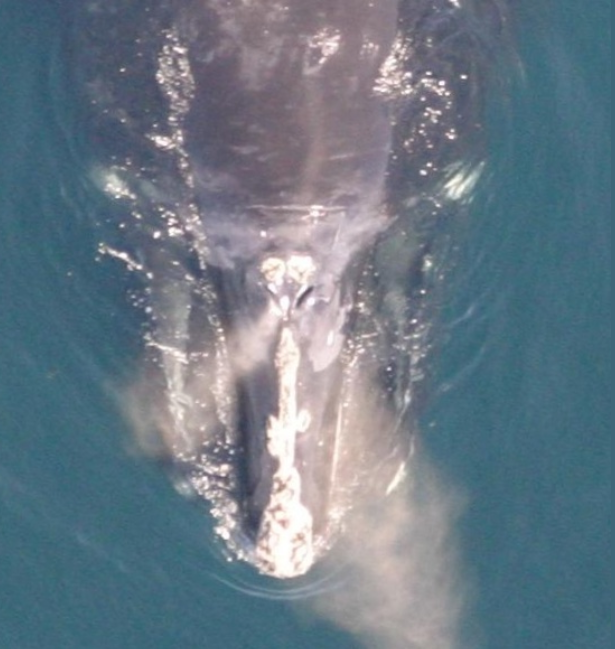

avant translation: (649, 615, 3)
après: (649, 615, 3)


In [182]:
shiftedImg = translationImg(imgFlipped, 4)
cv2_imshow(shiftedImg)
print("avant translation:", imgFlipped.shape)
print("après:", shiftedImg.shape)

### Channel shift

In [ ]:
def showHistoDistrib(img):
  colors = ("red", "green", "blue")
  channel_ids = (0, 1, 2)
  plt.figure()
  plt.xlim([0, 256])
  for channel_id, c in zip(channel_ids, colors):
      histogram, bin_edges = np.histogram(
          img[:, :, channel_id], bins=256, range=(0, 256)
      )
      plt.plot(bin_edges[0:-1], histogram, color=c)
  plt.show()

In [ ]:
def channelShift(img, value):
    value = int(random.uniform(-value, value))
    # print("VAL = ", value)
    print(img[1:5,1:5])
    img = cv2.add(img, value);
    # print("after")
    # print(img[1:5,1:5])
    # img[:,:,:][img[:,:,:]>255]  = 255
    # img[:,:,:][img[:,:,:]<0]  = 0
    # img = img.astype(np.uint8)
    return img

After color perturbation

[[[116  94  66]
  [117  95  67]
  [117  95  67]
  [115  93  64]]

 [[118  97  67]
  [119  97  68]
  [118  97  67]
  [116  95  64]]

 [[118  97  65]
  [119  98  67]
  [119  98  67]
  [116  95  63]]

 [[116  95  63]
  [118  97  65]
  [118  97  64]
  [115  94  61]]]


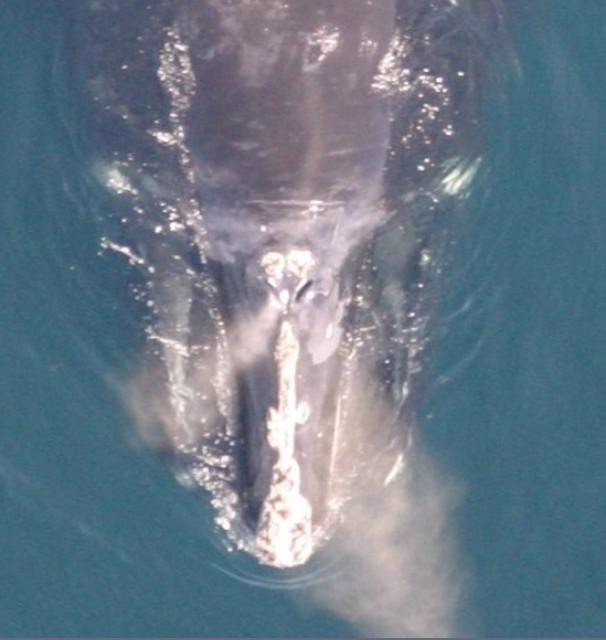

(640, 606, 3)


In [ ]:
colImg = channelShift(shiftedImg, 60)
cv2_imshow(colImg)
print(colImg.shape)
# print(colImg[1:2,:])

before


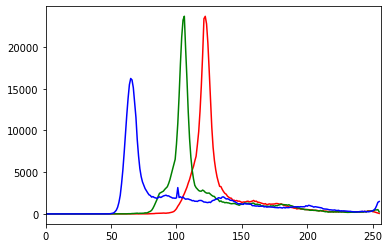

after color perturbation


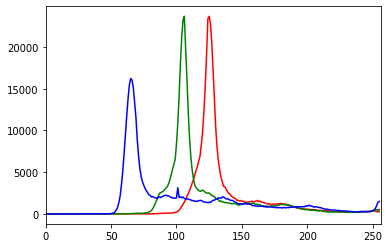

(640, 606, 3)


In [ ]:
print("before")
showHistoDistrib(shiftedImg)
print("after color perturbation")
showHistoDistrib(colImg)
print(colImg.shape)

In [ ]:
!pip install Augmentor

In [ ]:
# import Augmentor

# p = Augmentor.Pipeline("./Test")
# p.random_distortion(probability=1, grid_width=4, grid_height=4, magnitude=8)
# p.flip_left_right(probability=0.5)
# p.sample(10)

Mesure de similarité entre deux images

In [ ]:
def PSNR(original, transformed):
 mse = np.mean((original - transformed) ** 2)
 if(mse == 0):
  return 100
 max_pixel = 255.0
 psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
 return psnr 

In [ ]:
im1 = channelShift(shiftedImg, 60)
im2 = channelShift(imgFlipped, 1000)
im3 = channelShift(shiftedImg, 60)

test = PSNR(shiftedImg,shiftedImg)
print(test,"dB")

[[[116  94  66]
  [117  95  67]
  [117  95  67]
  [115  93  64]]

 [[118  97  67]
  [119  97  68]
  [118  97  67]
  [116  95  64]]

 [[118  97  65]
  [119  98  67]
  [119  98  67]
  [116  95  63]]

 [[116  95  63]
  [118  97  65]
  [118  97  64]
  [115  94  61]]]
[[[114  92  64]
  [115  93  65]
  [115  93  66]
  [115  92  65]]

 [[115  93  65]
  [115  93  65]
  [115  93  65]
  [114  92  64]]

 [[116  94  66]
  [117  95  67]
  [117  95  67]
  [115  93  64]]

 [[118  97  67]
  [119  97  68]
  [118  97  67]
  [116  95  64]]]
[[[116  94  66]
  [117  95  67]
  [117  95  67]
  [115  93  64]]

 [[118  97  67]
  [119  97  68]
  [118  97  67]
  [116  95  64]]

 [[118  97  65]
  [119  98  67]
  [119  98  67]
  [116  95  63]]

 [[116  95  63]
  [118  97  65]
  [118  97  64]
  [115  94  61]]]
100 dB


### All together

We apply successively the transformations to a given image in a given group, then save it to the augmented images folder <br>

**pathSrc**: path where are located the images to be augmented <br>
**pathDst**: path where will be located the augmented images <br>
**factorTrans** up to 4 pixels <br>
**nbAugmentedImg**: number of augmented images to be produced for a given image of a whale

In [174]:
def applyDataAugmentation(pathSrc, pathDst, factorTrans, factorChanShift, nbAugmentedImg):
  for f in glob.glob(pathSrc):
    for i in range(0, nbAugmentedImg):
      imgName = keepOriginalFileName(f)
      #given the whale file name image (imgName), gives the file whale ID corresponding to it
      whaleId = data["whaleID"].where(data["Image"] == imgName ).dropna().values[0] 
      img = cv2.imread(cv2.samples.findFile(f))
      if img is None:
        sys.exit("Could not read the image.")
      # Apply the transformations
      scale_img = random.uniform(1, 1.2)
      imgScaled = cv2.resize(img, None, fx= scale_img, fy= scale_img, interpolation= cv2.INTER_LINEAR)
      cv2.imwrite(pathDst+str(i)+"-"+"-"+whaleId+"-"+imgName, imgScaled) 
      i+=1
      imgFlipped = cv2.flip(img, 1)
      cv2.imwrite(pathDst+str(i)+"-"+"-"+whaleId+"-"+imgName, imgFlipped)
      i+=1
      imgTranslated = translationImg(img, factorTrans)
      cv2.imwrite(pathDst+str(i)+"-"+"-"+whaleId+"-"+imgName, imgTranslated) 
      print(f)
      #finalImg = channelShift(imgTranslated, factorChanShift)

In [183]:
applyDataAugmentation("./NewGroupWhales/*.jpg", "./TheAugmentedImages/", 4, 60, 1)

tx
nb: -2
Average= [98.19785575 67.06920078 40.62573099]
./NewGroupWhales/wCR_5625.jpg
tx
nb: -3
Average= [95.00563607 68.8099839  45.89452496]
./NewGroupWhales/wCR_2374.jpg
ty
nb: -2
Average= [96.23125    79.5546875  71.09453125]
./NewGroupWhales/wCR_3313.jpg
ty
nb: 3
Average= [111.61686992  93.06402439  83.29014228]
./NewGroupWhales/wCR_7863.jpg
tx
nb: 2
Average= [35.74321267 38.18778281 31.58597285]
./NewGroupWhales/wCR_3239.jpg
tx
nb: 2
Average= [46.47251773 46.38741135 39.79255319]
./NewGroupWhales/wCR_8953.jpg
tx
nb: 2
Average= [81.85334873 79.54503464 76.09122402]
./NewGroupWhales/wCR_6556.jpg
tx
nb: 1
Average= [92.3573201  89.36476427 88.8560794 ]
./NewGroupWhales/wCR_8013.jpg
tx
nb: -2
Average= [81.39402697 79.57418112 67.27360308]
./NewGroupWhales/wCR_5138.jpg
ty
nb: -4
Average= [76.4520202  70.7114899  62.48674242]
./NewGroupWhales/wCR_1467.jpg
tx
nb: -1
Average= [127.19727891  93.00340136  54.8537415 ]
./NewGroupWhales/wCR_3348.jpg
tx
nb: -2
Average= [129.83550489 101.73452

In [207]:
content = []
for imageName in glob.glob("./TheAugmentedImages/*.jpg"):
      imgName = keepOriginalFileName(imageName)
      whaleId = data["whaleID"].where(data["Image"] == imgName ).dropna().values[0] 
      content.append(whaleId)
print(len(np.unique(content))) # OK
print(np.unique(content))

53
['whale_02839' 'whale_03103' 'whale_04480' 'whale_05140' 'whale_07331'
 'whale_07483' 'whale_08729' 'whale_09422' 'whale_13701' 'whale_14626'
 'whale_16576' 'whale_16762' 'whale_17327' 'whale_21655' 'whale_22212'
 'whale_22848' 'whale_26212' 'whale_27860' 'whale_34513' 'whale_34813'
 'whale_38437' 'whale_40483' 'whale_44699' 'whale_45294' 'whale_45367'
 'whale_45728' 'whale_47768' 'whale_48024' 'whale_51114' 'whale_51332'
 'whale_54497' 'whale_54796' 'whale_56281' 'whale_64299' 'whale_65263'
 'whale_66539' 'whale_67801' 'whale_69943' 'whale_73167' 'whale_77984'
 'whale_80124' 'whale_81915' 'whale_83157' 'whale_86081' 'whale_87420'
 'whale_88085' 'whale_88226' 'whale_88432' 'whale_89271' 'whale_90141'
 'whale_90929' 'whale_90966' 'whale_97440']
